# CAO Points Analysis

## Author : Michelle O'Connor

***

In [1]:
# To access a URL from python
# import urllib

# Convenient HTTP requests
import requests as rq

# Regular expressions
import re

# Should always call this out on the requirements txt file as it doesn't come as standard package with python
# Only if you have anaconda does it come with the package

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# for downloading 
import urllib.request as urlrq

# Import required modules
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Get the current date and time
now = dt.datetime.now()

# Format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

<br>

## 2021 Points 
https://www.cao.ie/index.php?page=points&p=2021&bb=points
***

In [3]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')

#### Save Original data set

***

In [4]:
# Create a file path for the original data
pathhtml = 'data/cao2021_' + nowstr + '.html'

<br>

**Error on server**

Technically, the server says we should decode as per:
```
Content-Type: text/html; charset=iso-8859-1
```
However, one line uses \x96 which isn't defined in iso-8859-1.
<br>Therefore we use the similar decoding standard cp1252, which is very similar but includes #x96.

In [5]:
# The server uses the wrong encoding, fix it
original_encoding = resp.encoding
# Change to cp1252
resp.encoding = 'cp1252'

In [6]:
Student_dict = {
    'Name': ['Jack', 'Rack', 'Max'],
    'Marks':['100','100', '100'],
    'Fee':['100','200','300'],
    'Subject': ['Math', 'Math', 'Music']
}
  

dfobj = pd.DataFrame(Student_dict)

print(f'\n {dfobj.dtypes}')


 Name       object
Marks      object
Fee        object
Subject    object
dtype: object


In [7]:
 
dict_columns_type = {'Marks': float,
                'Fee': float
               }
   
dfobj = dfobj.astype(dict_columns_type)
print('dataframe str to float:\n',dfobj)
 
print(f'\n {dfobj.dtypes}')


dataframe str to float:
    Name  Marks    Fee Subject
0  Jack  100.0  100.0    Math
1  Rack  100.0  200.0    Math
2   Max  100.0  300.0   Music

 Name        object
Marks      float64
Fee        float64
Subject     object
dtype: object


In [8]:
Student_dict = {
    'Name': ['Jack', 'Rack', 'Max'],
    'Marks':[100,100,100],
    'Subject': ['Math', 'Math', 'Music']
}

In [9]:
dfobj = pd.DataFrame(Student_dict)

In [10]:
dfobj.dtypes

Name       object
Marks       int64
Subject    object
dtype: object

In [11]:
dfobj = dfobj.infer_objects()
print(dfobj.dtypes)

Name       object
Marks       int64
Subject    object
dtype: object


In [12]:
Student_dict = {
    'Name': ['Jack', 'Rack', 'Max'],
    'Marks':[100,100,100],
    'Subject': ['Math', 'Math', 'Music']
}
  
 
 
dfobj = pd.DataFrame(Student_dict,dtype ='object')
dfobj.dtypes

Name       object
Marks      object
Subject    object
dtype: object

In [13]:
dfobj = dfobj.infer_objects()
print(dfobj.dtypes)

Name       object
Marks       int64
Subject    object
dtype: object


In [14]:
raw_data = {'bond_name': ['govt_bond_1', 'govt_bond_2', 'govt_bond_3', 'pvt_bond_1', 'pvt_bond_2', 'pvt_bond_3', 'pvt_bond_4'],
                'risk_score': [1.6, 0.9, 2.3, 3.0, 2.7, 1.8, 4.1]}
df = pd.DataFrame(raw_data, columns = ['bond_name', 'risk_score'])
    
print(df)

     bond_name  risk_score
0  govt_bond_1         1.6
1  govt_bond_2         0.9
2  govt_bond_3         2.3
3   pvt_bond_1         3.0
4   pvt_bond_2         2.7
5   pvt_bond_3         1.8
6   pvt_bond_4         4.1


In [15]:
rating = []
for row in df['risk_score']:
    if row < 1.0 :    rating.append('AA')
    elif row < 2.0:   rating.append('A')
    elif row < 3.0:  rating.append('BB')
    elif row < 4.0:  rating.append('B')
    elif row < 5.0:  rating.append('C')
    else:           rating.append('Not_Rated')

In [16]:
df['rating'] = rating
print(df) 

     bond_name  risk_score rating
0  govt_bond_1         1.6      A
1  govt_bond_2         0.9     AA
2  govt_bond_3         2.3     BB
3   pvt_bond_1         3.0      B
4   pvt_bond_2         2.7     BB
5   pvt_bond_3         1.8      A
6   pvt_bond_4         4.1      C


#### Scatterplot

In [17]:
# Read in the dataset
df_fifa21 = pd.read_csv('fifa-data/fifa2021players.csv')
# Select the countries you want to analyse
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina', 'Republic of Ireland']
# Creating a dataframe of the data of all the players whose nationality is one of the 5 selected countries
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

A scatter plot displays and shows the relation between two numerical variables in a dataset. In this case, we’ll see the relationship between the height and weight of players.

In this plot, we added the sto control the dot size and also hue to differentiate the nationality

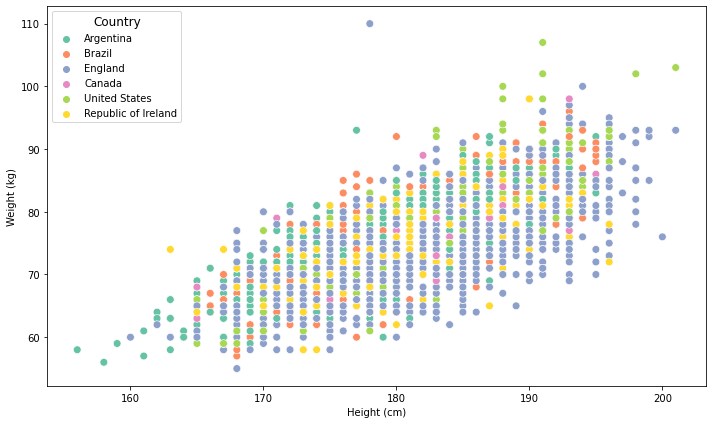

In [18]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

In [19]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=new_df, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

NameError: name 'new_df' is not defined

<Figure size 720x432 with 0 Axes>

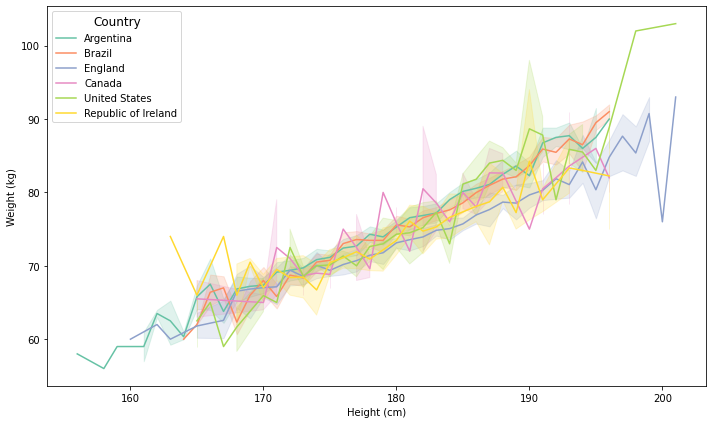

In [20]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.lineplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2')
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

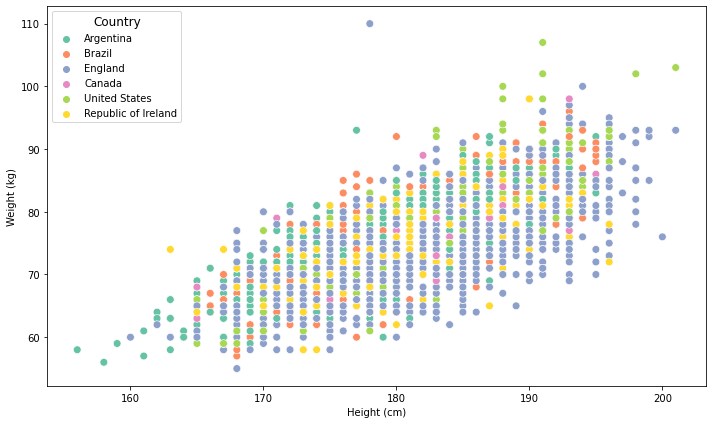

In [21]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

In [23]:
new_df10 = pd.concat(
[df_country[df_country['nationality']=='Argentina'][:10], 
 df_country[df_country['nationality']=='Brazil'][:10], 
 df_country[df_country['nationality']=='England'][:10], 
 df_country[df_country['nationality']=='Canada'][:10], 
 df_country[df_country['nationality']=='United States'][:10], 
 df_country[df_country['nationality']=='Republic of Ireland'][:10]]
)

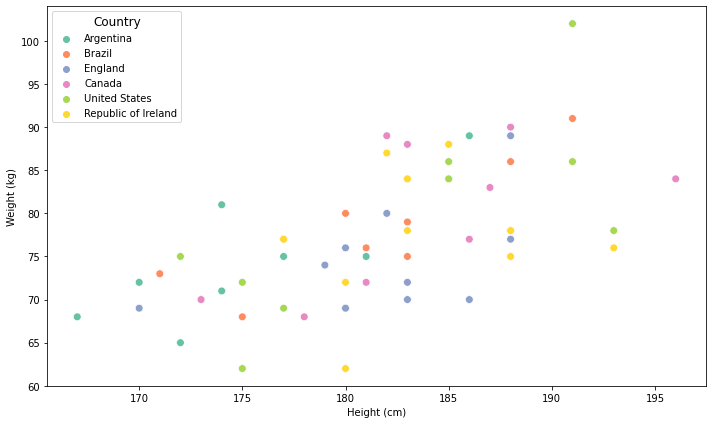

In [24]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=new_df10, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

From this scatterplot, we can see that weight and height distribution fit a simple linear regression.